In [1]:
import sys
sys.path.append('../')
from helpers import *
from models import *

In [2]:
imgs, classes, tf_img_names = get_images('images/train', infer=False)
imgs, classes = transform_input(imgs, classes, infer=False)

In [3]:
imgs_test, classes_test, tf_img_names_test = get_images('images/test', infer=False)
imgs_test, classes_test = transform_input(imgs_test, classes_test, infer=False)

In [4]:
#In test mode the model returns the accuracy. 
acc = tf_lenet_model(imgs_test, classes_test, 'test')

INFO:tensorflow:Restoring parameters from /Users/jmoralesa/Desktop/test/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt
Testing accuracy:  0.94650203


94% accuracy! This is mainly because of how good nets are for detecting local features and obviously working with the three color channels. As I mentioned before, one way to improve this ratio could be augmenting the images but without rotating the images because for example in the signs with right and left arrows the model could get confused.

In [5]:
#Doing inference so we can get the predictions.
preds = tf_lenet_model(imgs_test, classes_test, 'infer')

INFO:tensorflow:Restoring parameters from /Users/jmoralesa/Desktop/test/German-Traffic-Signs-Detector/models/model3/saved/model3.ckpt


## Show all  predictions of the model

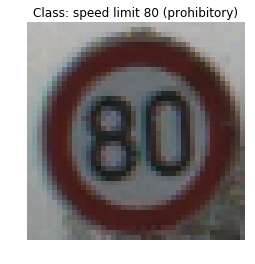

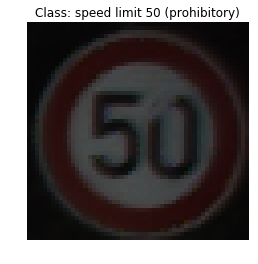

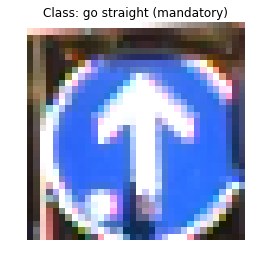

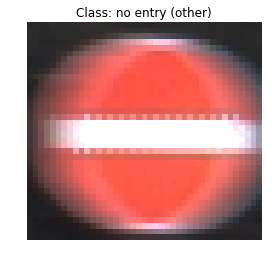

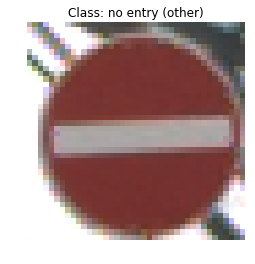

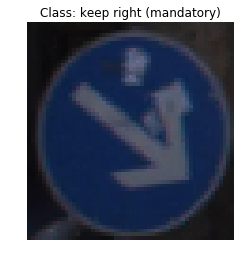

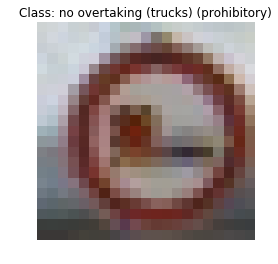

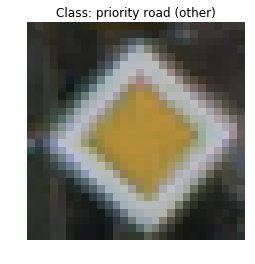

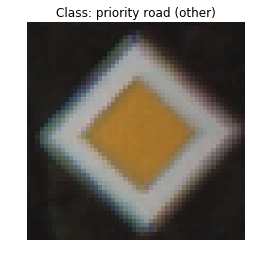

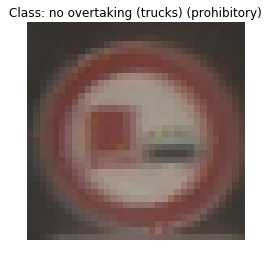

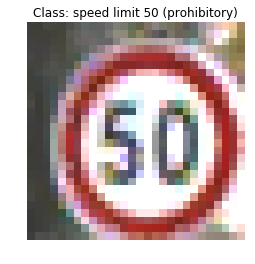

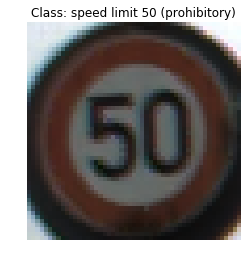

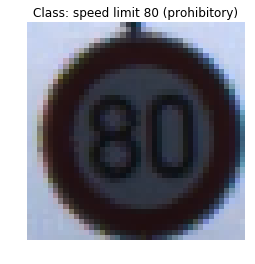

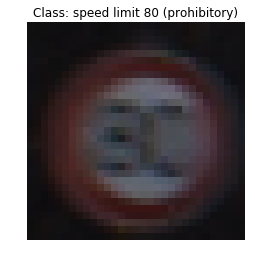

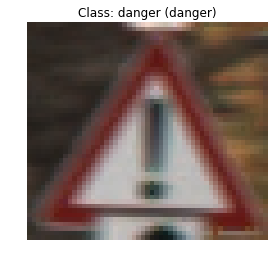

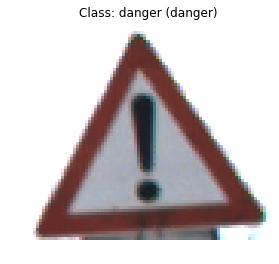

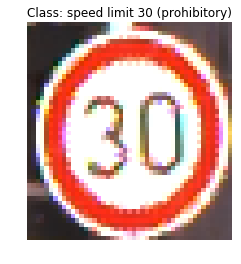

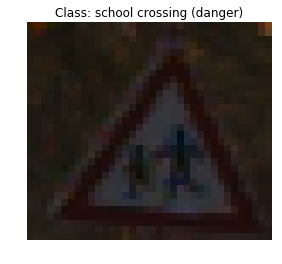

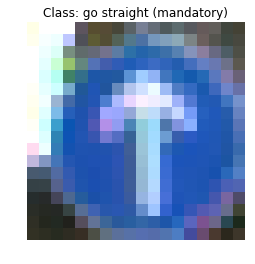

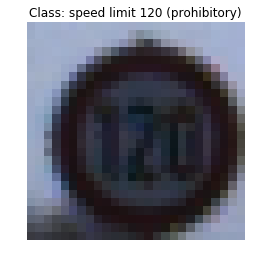

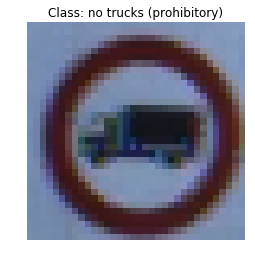

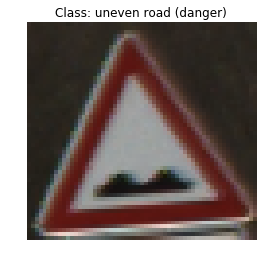

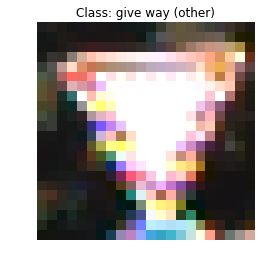

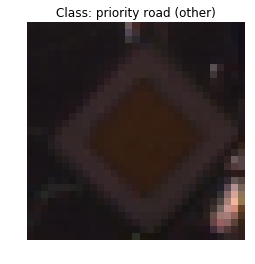

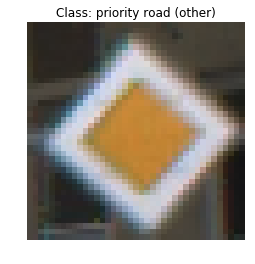

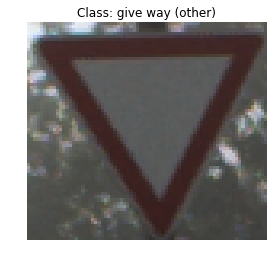

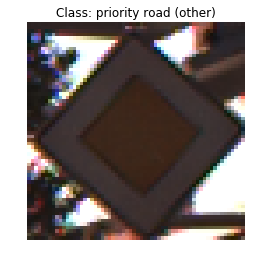

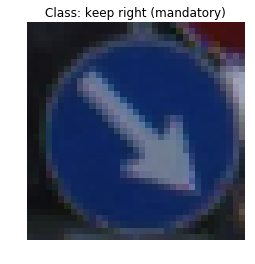

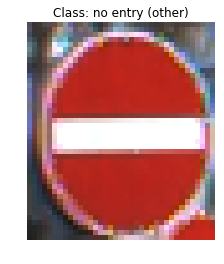

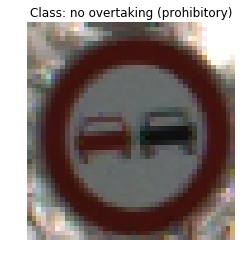

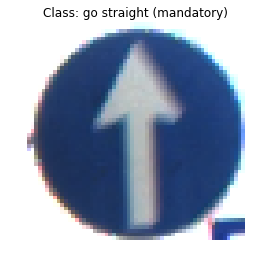

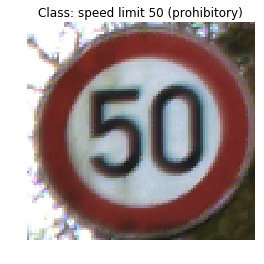

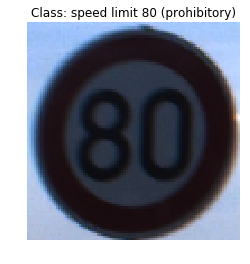

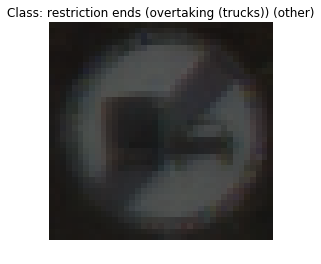

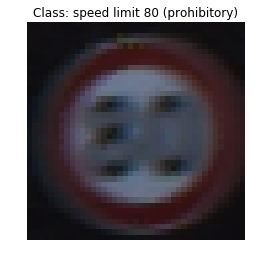

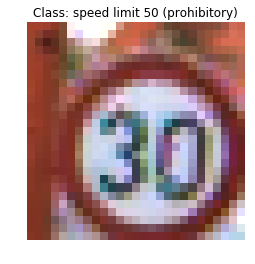

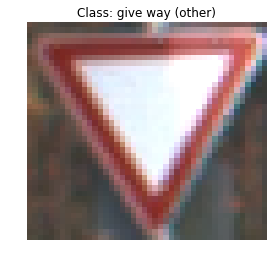

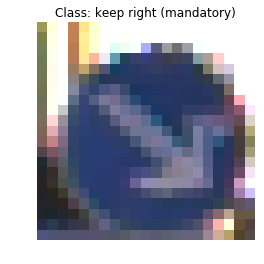

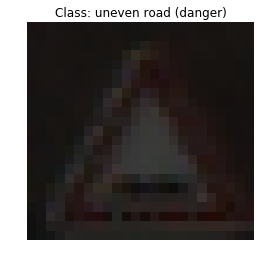

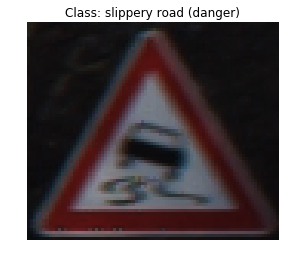

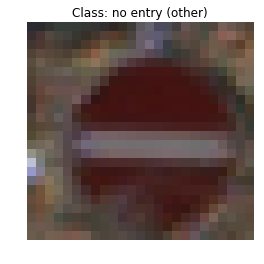

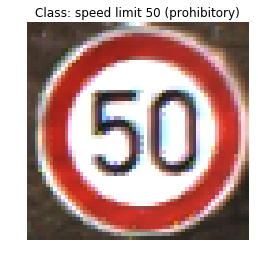

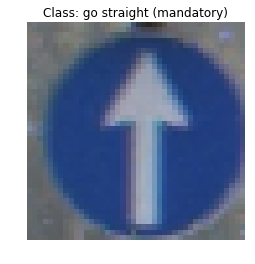

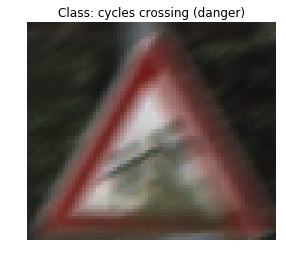

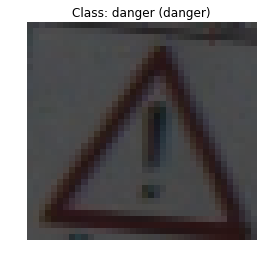

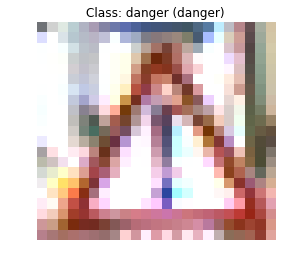

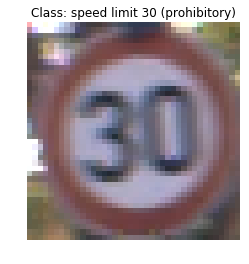

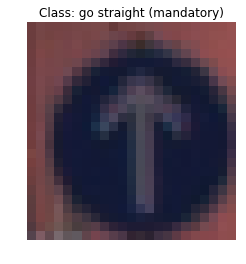

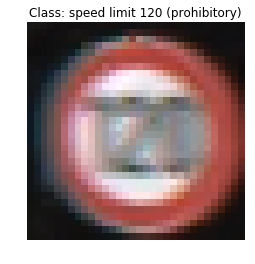

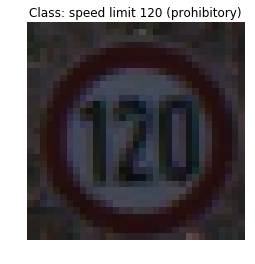

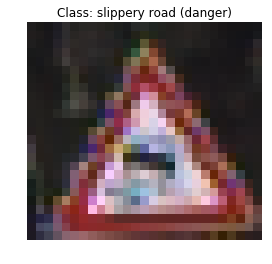

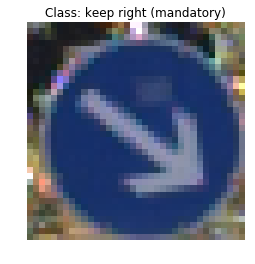

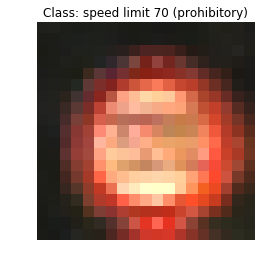

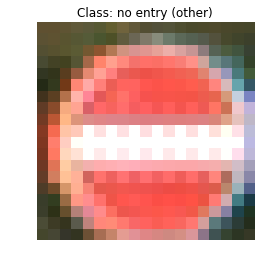

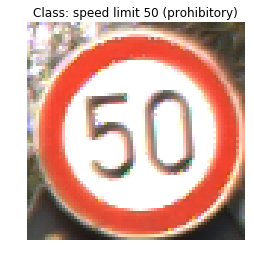

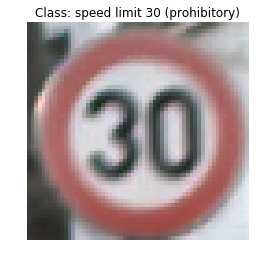

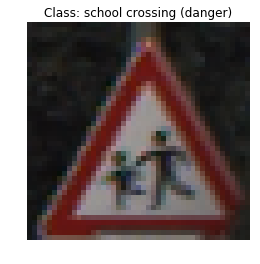

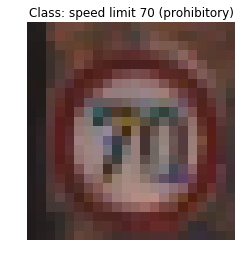

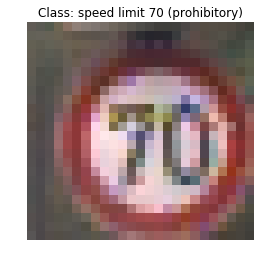

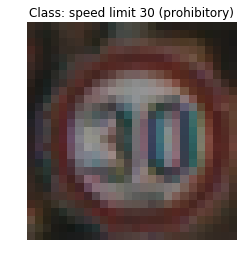

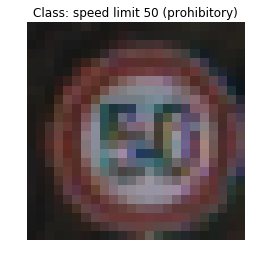

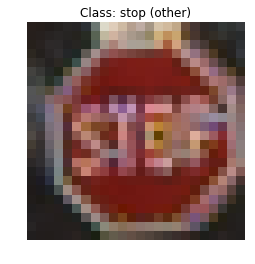

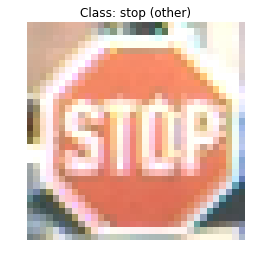

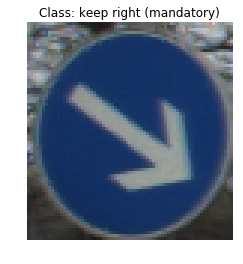

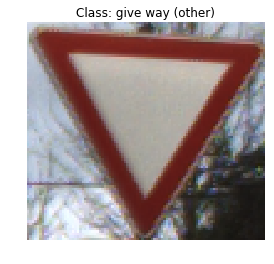

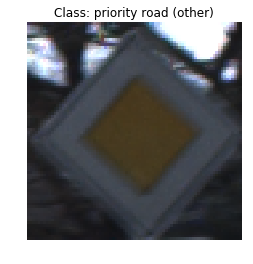

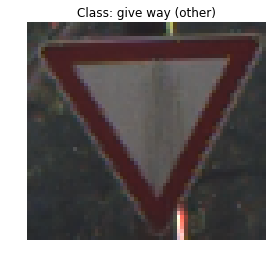

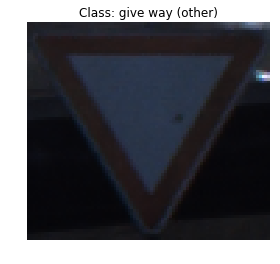

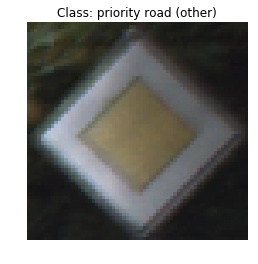

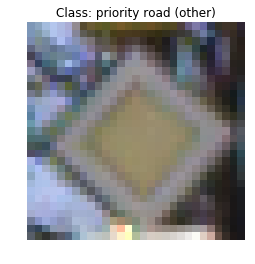

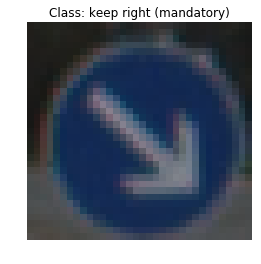

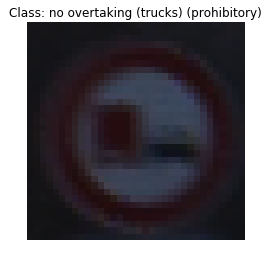

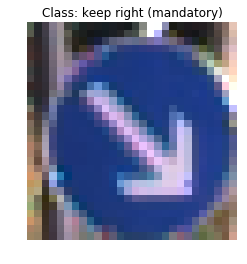

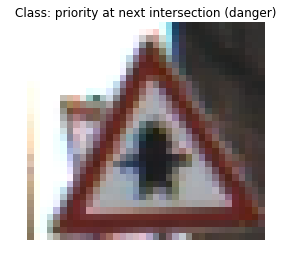

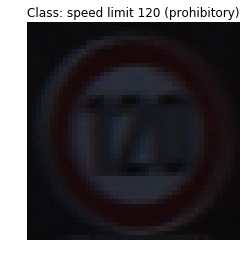

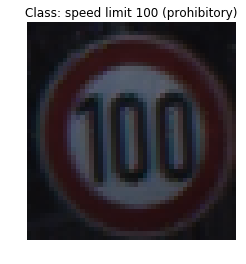

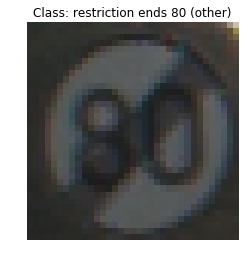

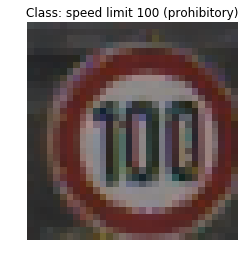

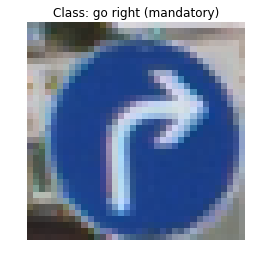

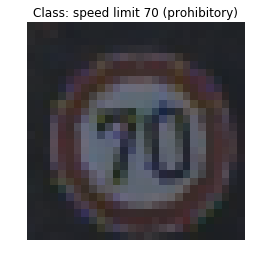

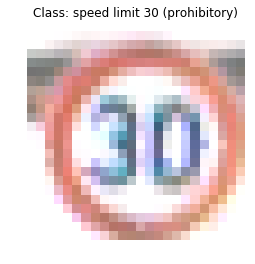

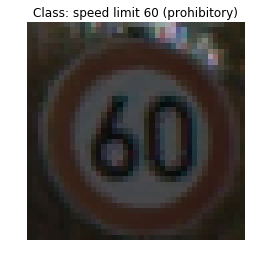

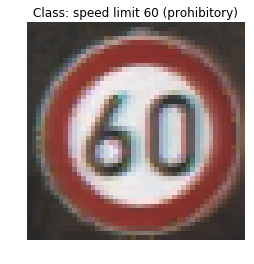

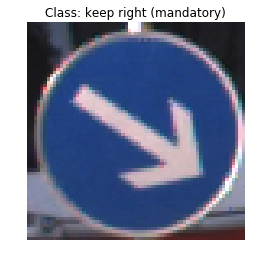

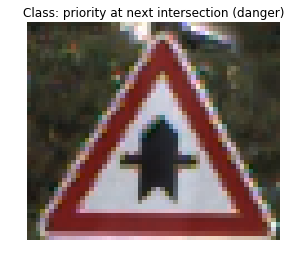

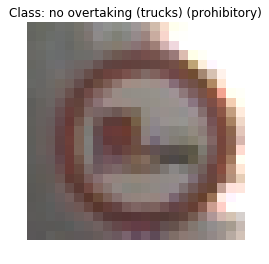

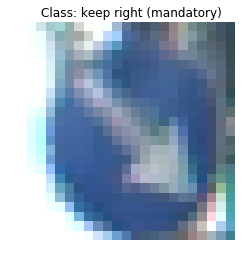

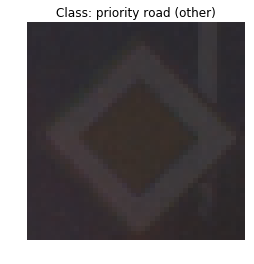

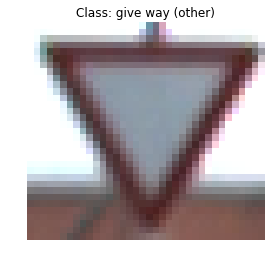

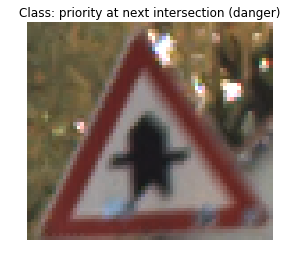

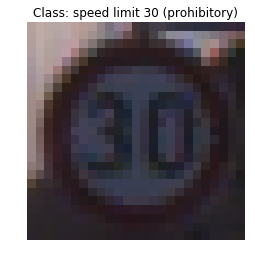

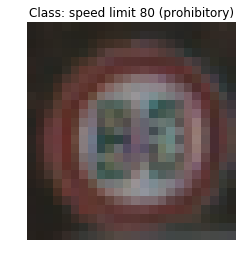

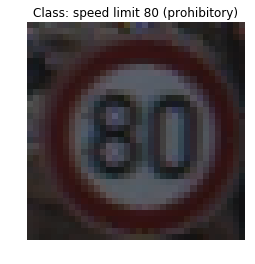

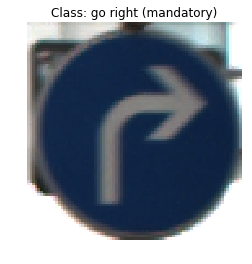

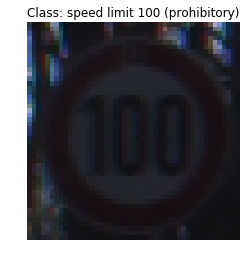

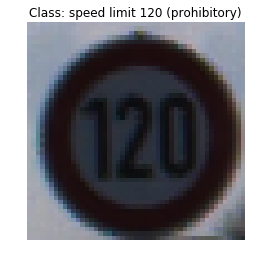

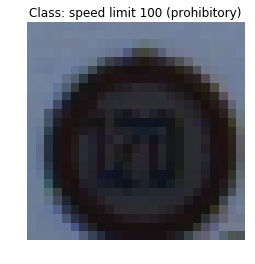

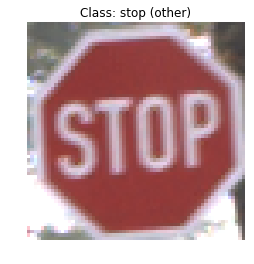

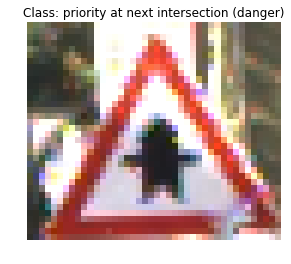

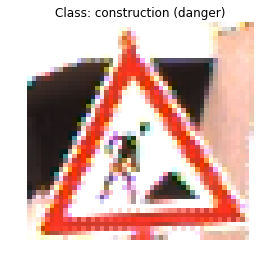

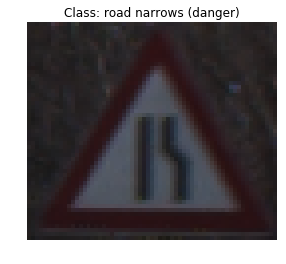

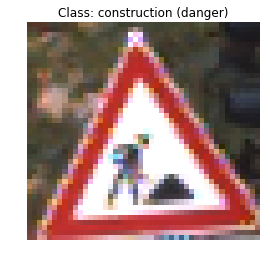

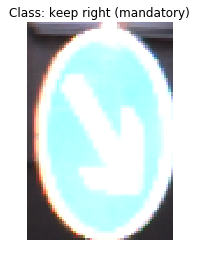

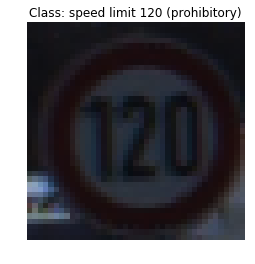

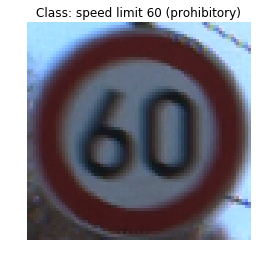

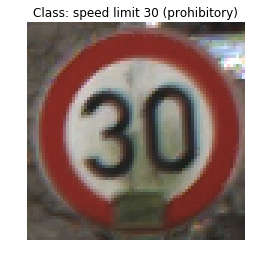

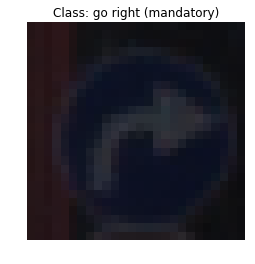

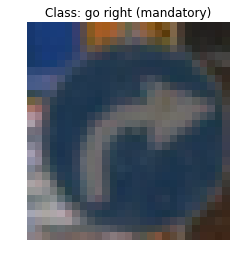

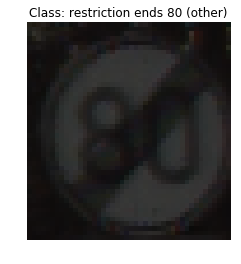

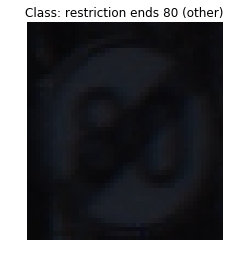

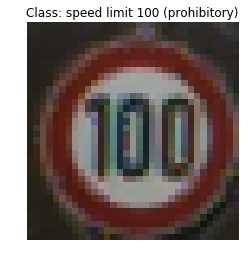

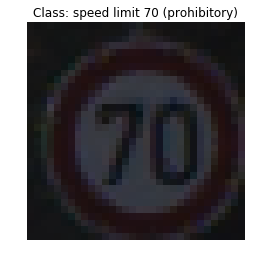

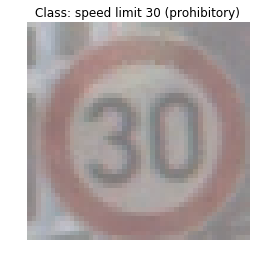

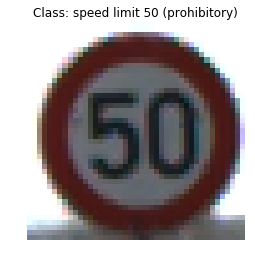

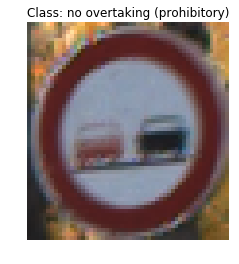

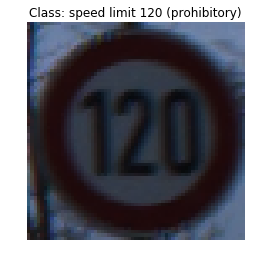

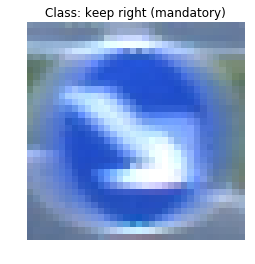

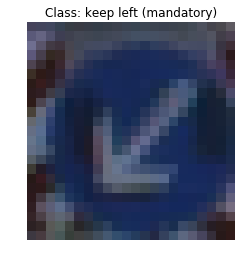

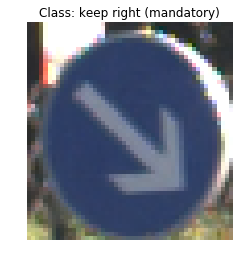

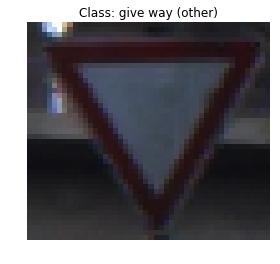

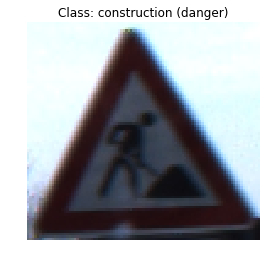

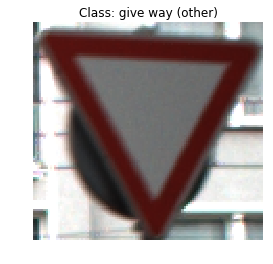

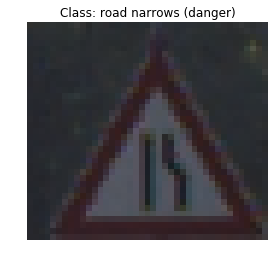

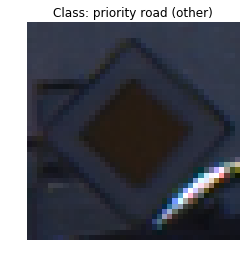

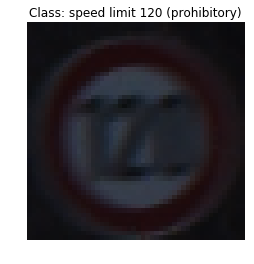

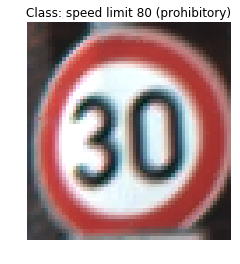

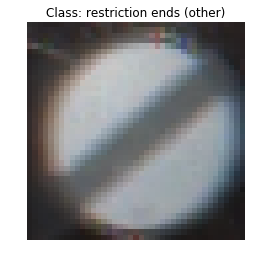

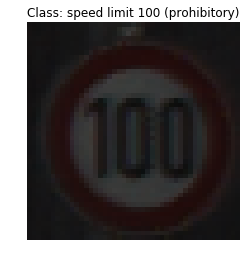

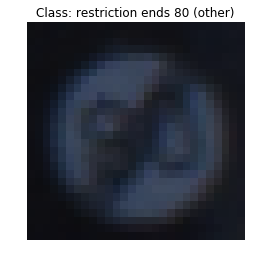

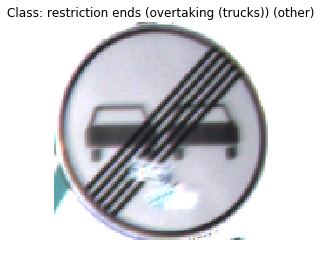

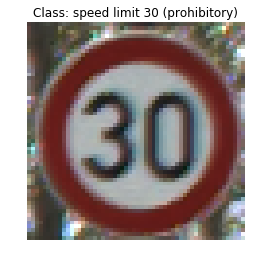

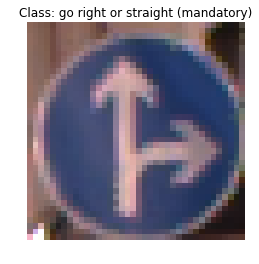

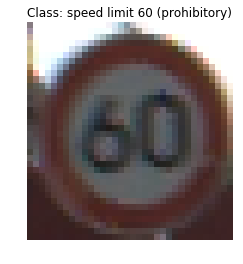

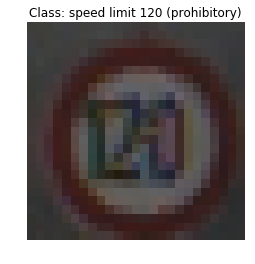

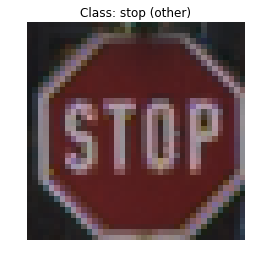

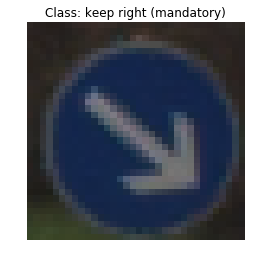

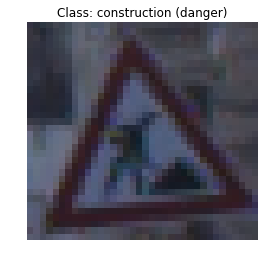

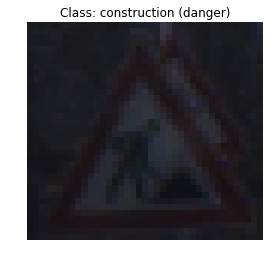

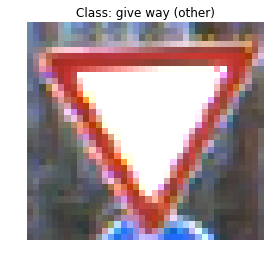

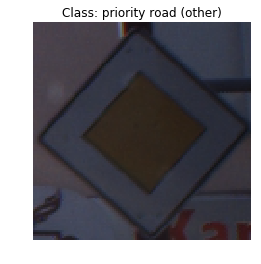

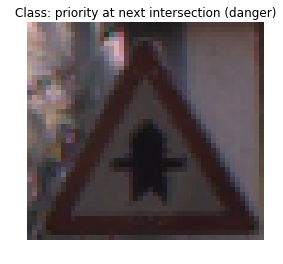

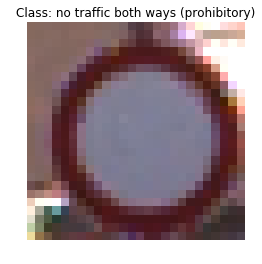

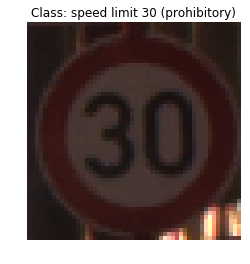

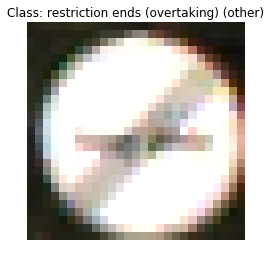

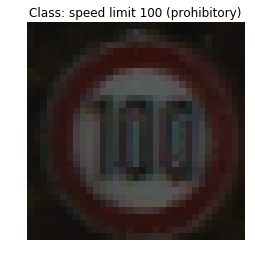

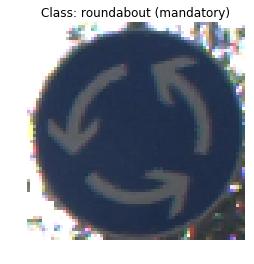

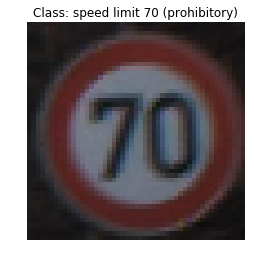

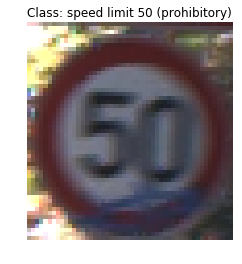

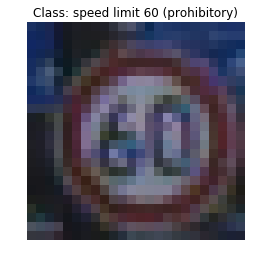

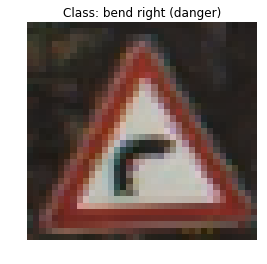

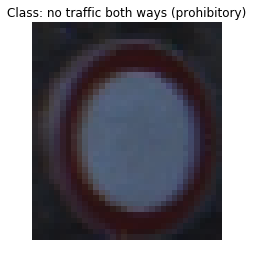

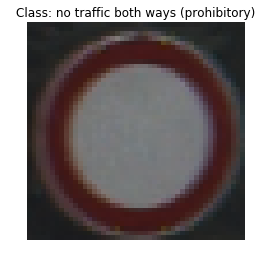

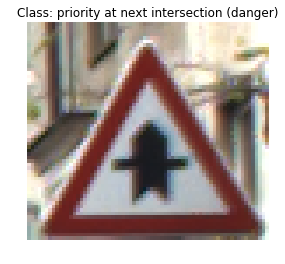

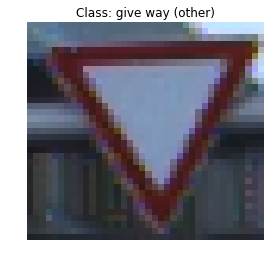

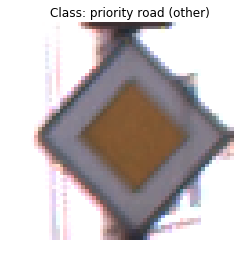

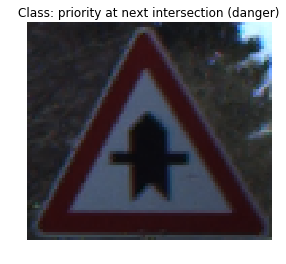

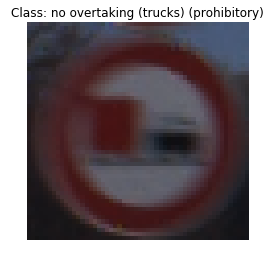

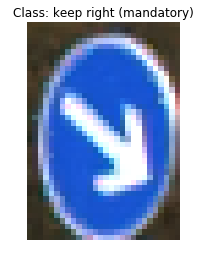

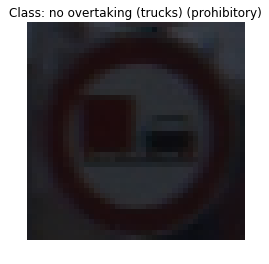

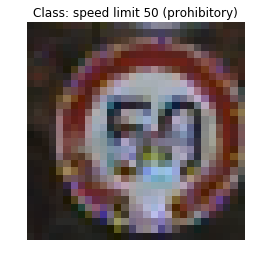

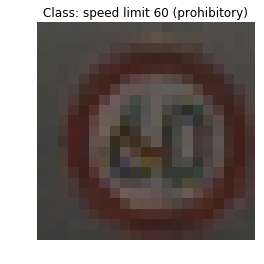

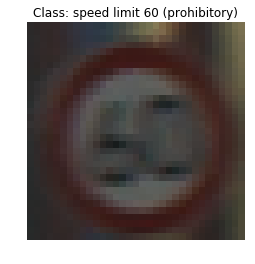

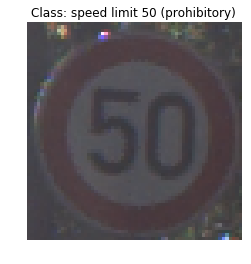

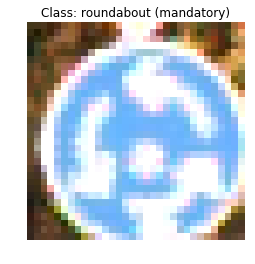

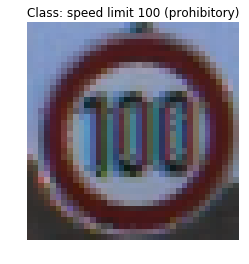

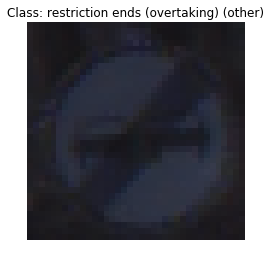

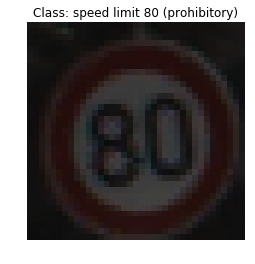

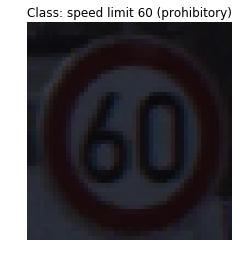

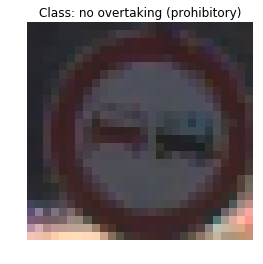

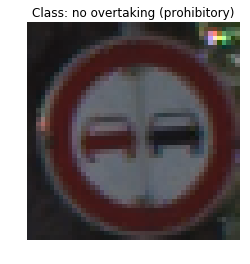

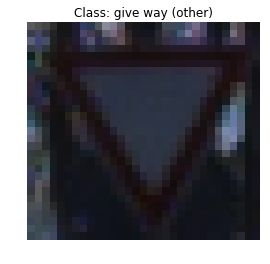

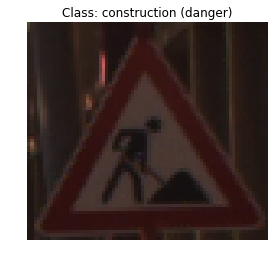

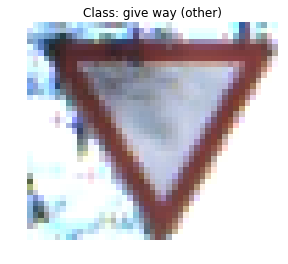

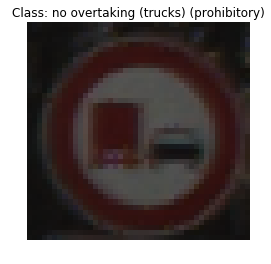

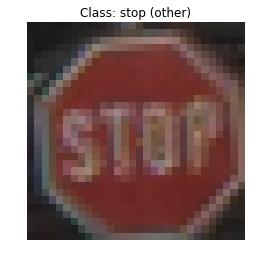

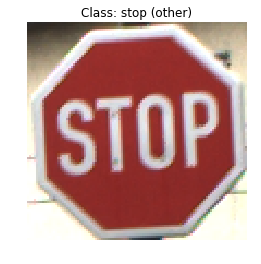

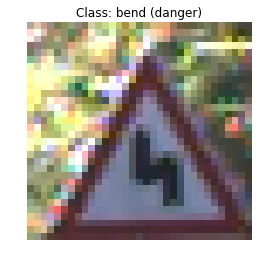

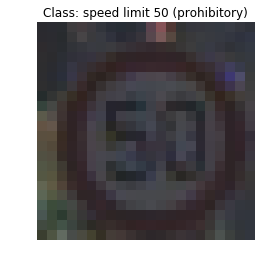

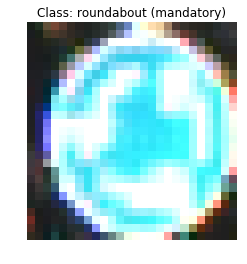

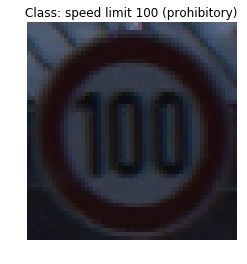

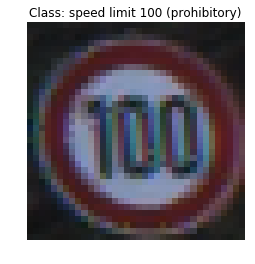

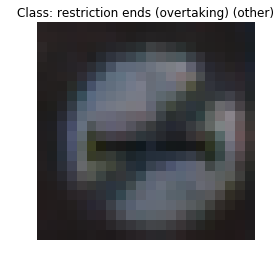

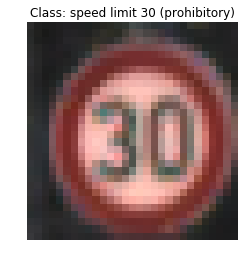

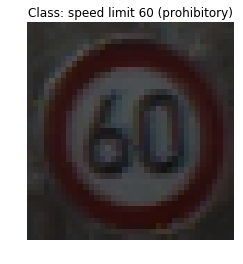

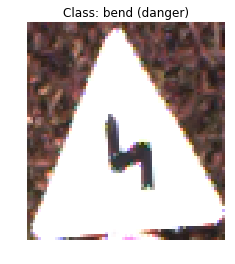

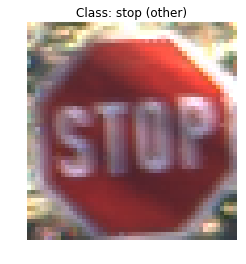

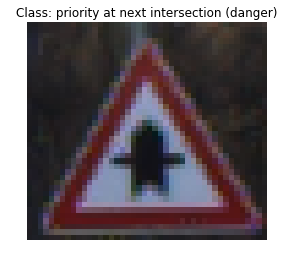

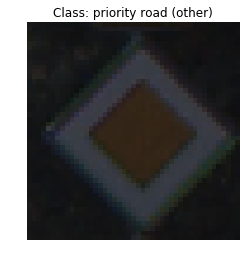

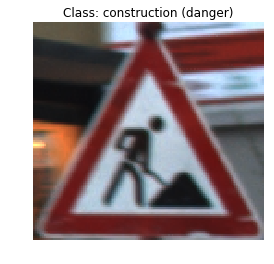

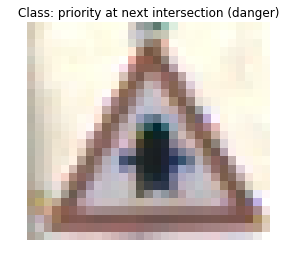

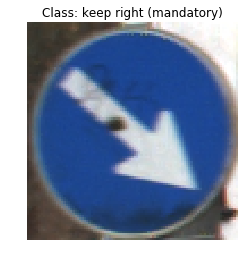

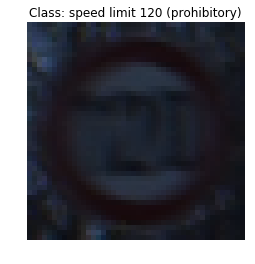

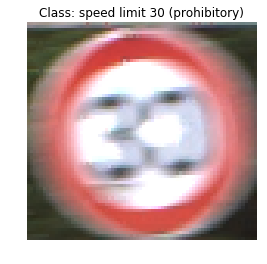

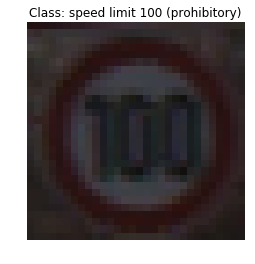

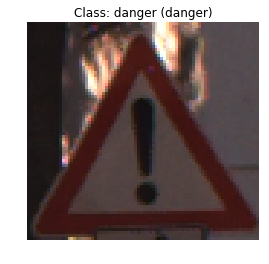

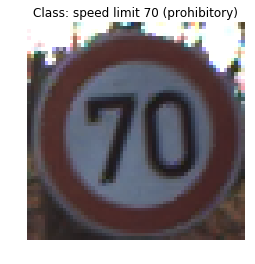

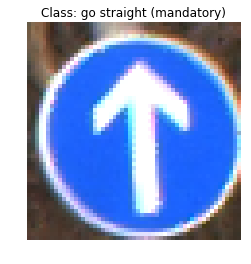

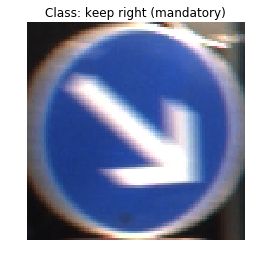

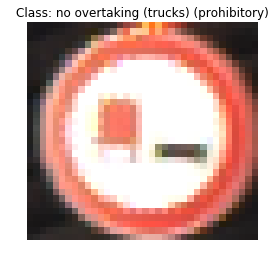

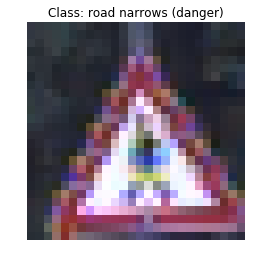

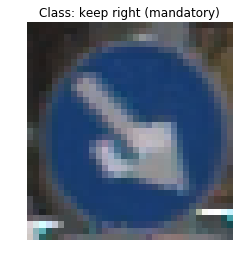

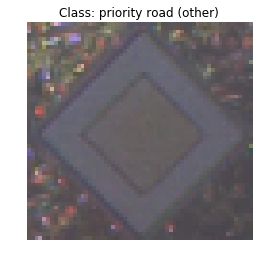

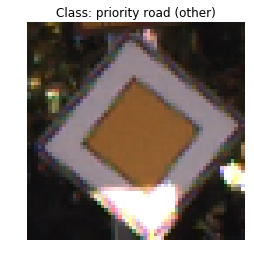

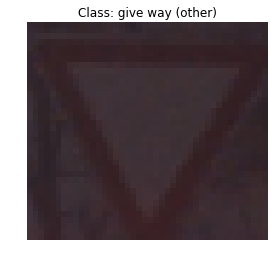

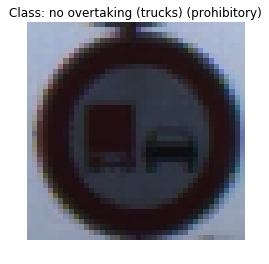

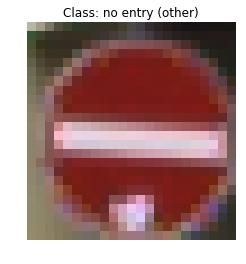

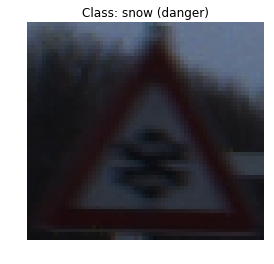

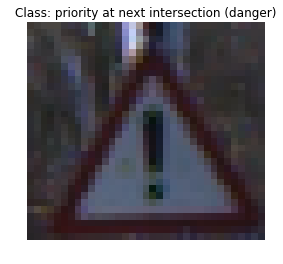

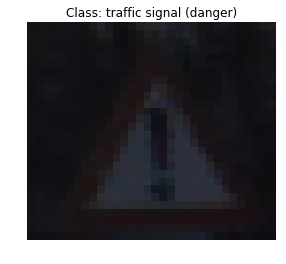

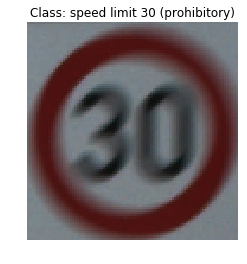

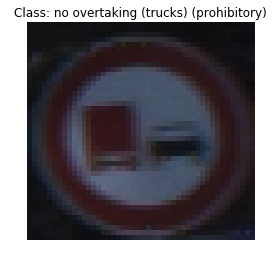

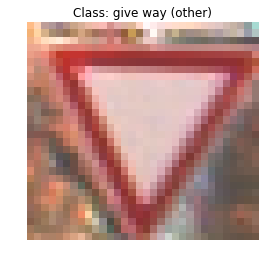

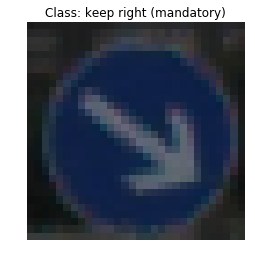

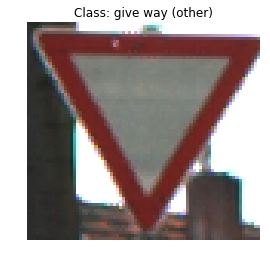

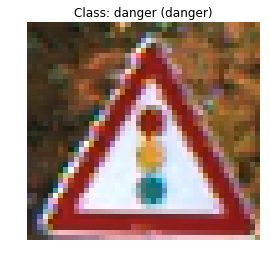

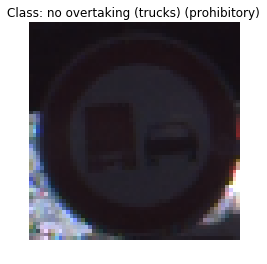

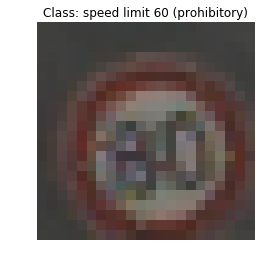

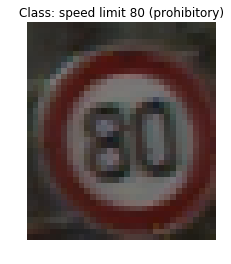

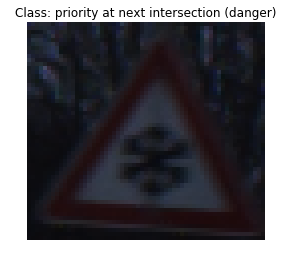

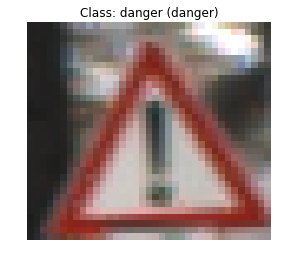

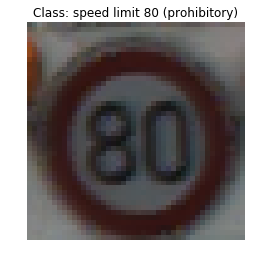

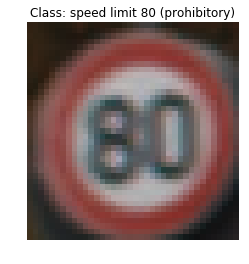

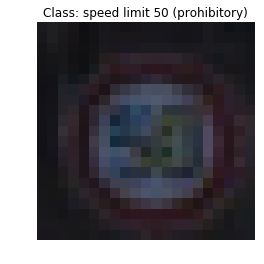

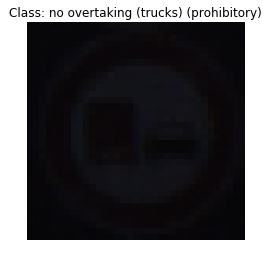

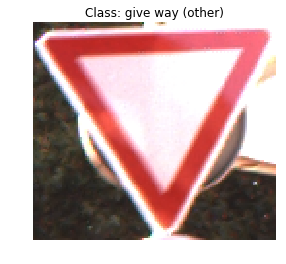

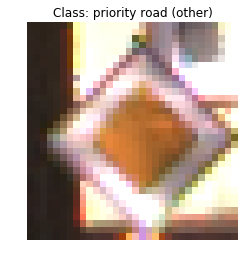

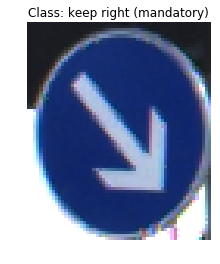

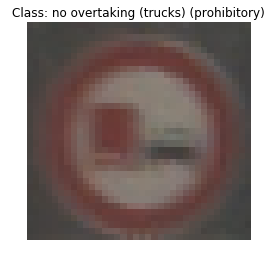

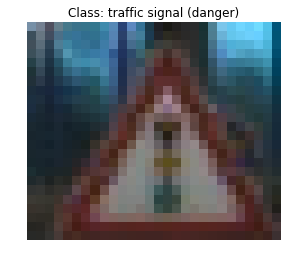

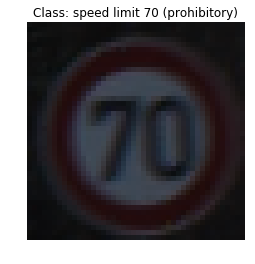

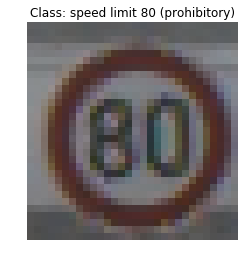

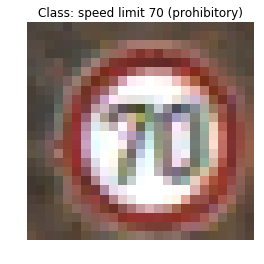

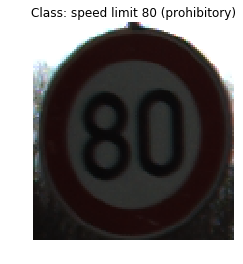

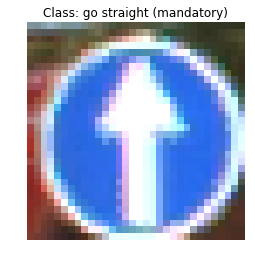

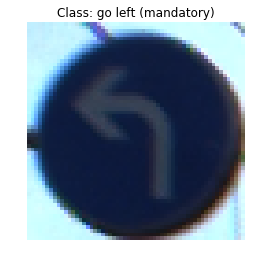

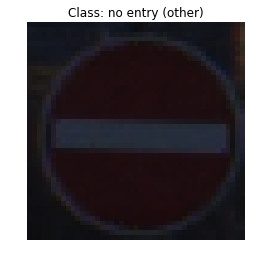

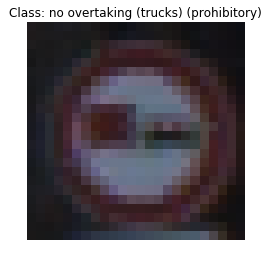

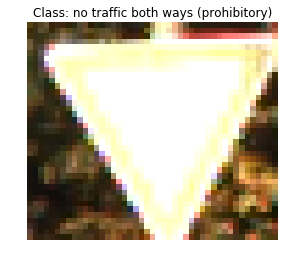

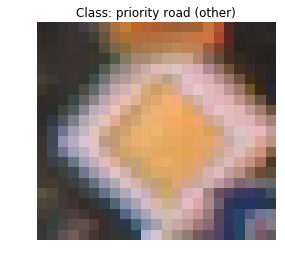

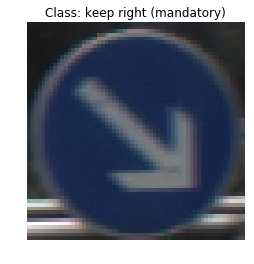

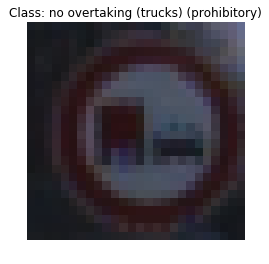

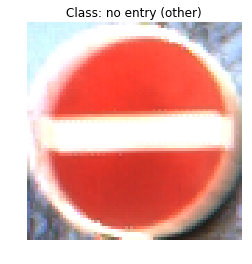

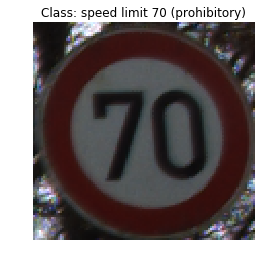

In [6]:
show_predictions(preds, 'images/test', tf_img_names_test)

In [7]:
predictions_df = pd.DataFrame(preds, columns=['pred']) 
predictions_df['real'] = np.asarray(classes_test.argmax(axis=1).squeeze())[0]
pred_errors = predictions_df[predictions_df['real'] != predictions_df['pred']]

In [8]:
idx = pred_errors.index
img_names_errors = pd.Series(tf_img_names_test)[idx]

These are the samples in which the model predicted a wrong class. Some images are not easy to understand, others are just errors probably realted with class inbalance. 

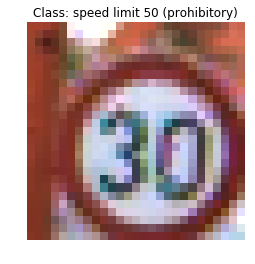

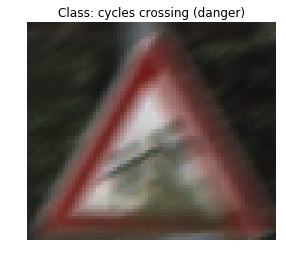

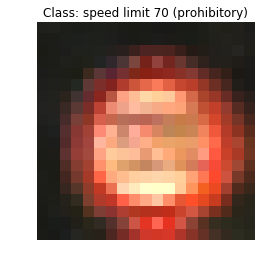

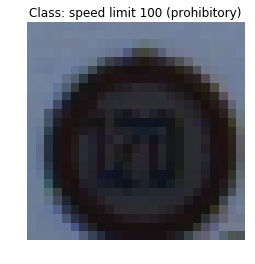

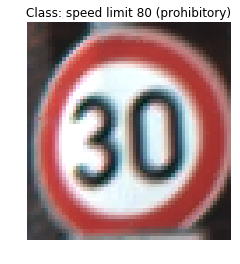

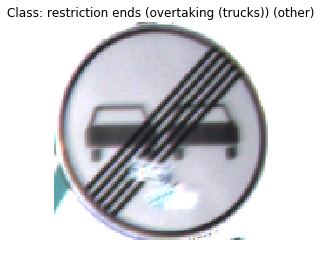

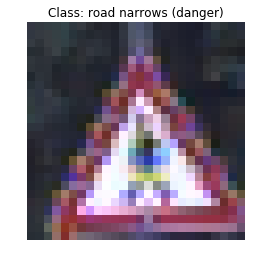

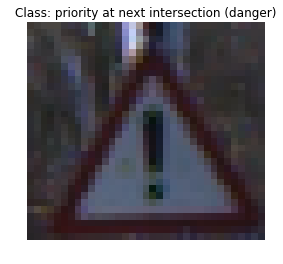

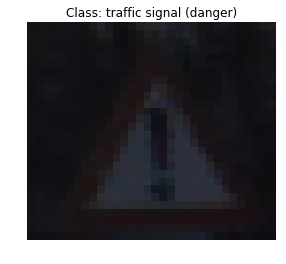

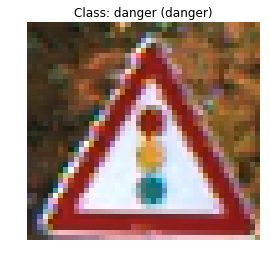

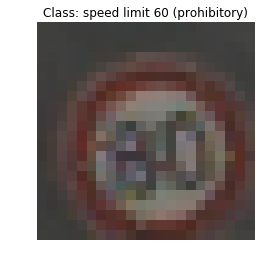

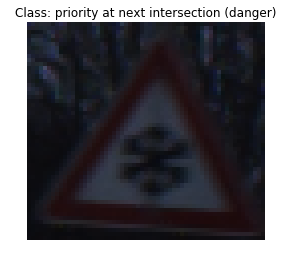

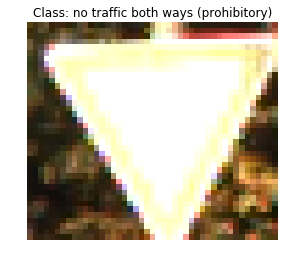

In [9]:
show_predictions(pred_errors['pred'].values, 'images/test', img_names_errors)

The model performs really good with this parameters both in the training set and in the test set. We could do more tunning, implement early stopping and if the goal was to get high testing accuracy we could replace tanh activation functions with relu and use a bigger net without downscaling so much the images. 